<a href="https://colab.research.google.com/github/Eunjane/J-sMathematical.github.io-/blob/main/R%20program%20lab10_Park.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 10: Regression for Prediction and Preparation for Project Submission (30 points)**

#### **WRITE YOUR NAME HERE**


---
**Instructions**: Complete the lab below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---

The goal of this lab is to
1. provide additional practice building regression models for prediction and
2. help you set up your submission of the final task for the project



<br>

---

<br>






## Data

Data for the project is available [here](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv). A data dictionary describing the meaning of each of the variables in the dataset is available in the Project module in Canvas.

<br>

---

<br>






## Introduction

Chronic obstructive pulmonary disease (COPD) affects over 16 million Americans and is the fourth leading cause of death in the United States behind heart disease, cancer, and accidental death. While COPD can result from various toxic inhalations or asthma, it is most commonly associated with cigarette smoking. 

<br>

COPD severity is typically measured by a device called a spirometer. Patients forcefully exhale into the device and the volume of air exhaled is used as a measure for the severity of disease (less air exhaled $\Rightarrow$ worse disease). Data collected by the COPDGene research group includes spirometry data on thousands of research participants.

<br>

Spirometry measures in the dataset:
* The forced expiratory volume (`FEV1`) is the volume of air exhaled in 1 second
* The forced vital capacity (`FVC`) is the total volume of air exhaled after a full breath
* `FEV1_FVC_ratio` is the ratio between `FEV1` and `FVC` (smaller $\Rightarrow$ worse disease)
* `FEV1_phase2` is the `FEV1` of research participants 5 years later

<br>

You overall task in this project is to analyze the relationship between FEV1 at follow-up `FEV1_phase2` and other variables in the dataset. The project has been organized into a series of tasks to assist you with your analysis organization.

<br>

---

<br>






####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1. 
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2. 
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 0</font> (3 points)

1. Load the COPDGene dataset and show the first few lines.
2. Remove the NAs from the dataset and store as `dat1`. How many rows does `dat1` contain? Answer in a complete sentence.
3. Select all rows in the dataset where `FEV1_phase2` is `NA` and store as `test`. How many rows does `test` contain? Answer in a complete sentence.

Note: In machine learning, datasets are typically divided into training, validation, and testing sets
  * training set - a dataset used to fit your model
  * validation set - the dataset used to select your "best" model (e.g., using adjusted R-squared or MSE)
  * testing set - the dataset used to assess accuracy of your final model

Task 0.3 will be used as your testing set.

In [ ]:
#0.1
dat <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv")
head(dat)

#0.2
dat1 <- na.omit(dat)
nrow(dat1)

#0.3
#test <- subset( dat1, dat1$FEV1_phase2 == 'NA')
#View(dat1[, dat1$FEV1_phase2 == 'NA'])
#nrow(test)
#test <- dat[is.na(dat$FEV1_phase2), ] 
#nrow(test)
test <- dat[which(is.na(dat$FEV1_phase2)),]
nrow(test)

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
2,10006S,2008,1/15/2008,62.3,Female,White,162.6,86.0,170,80,⋯,5.2325,14.005900,-1.0000,-1.00000,-841.880,-1.000,0.43,1.288,3.022,NA
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924


[1] 4000

[1] 1747

0.2 Dat1 contains 4000 rows after removing NA fom dat.

0.3 test has 1747 rows that FEV1_phase2 is NA.

<br>

---

<br>






####<font color=red>Task 1</font>  (4 points)

1. Randomly partition `dat1` into training (`train`) and validation (`valid`) sets as done in lecture. It is convention to randomly select 70%-80% of your data for training and the remaining data for validation.
  * A seed is not necessary in this case.
  * None of the rows in the training dataset should be in the validation dataset

In [ ]:
#1.
samp <- sample(1:nrow(dat1), 70 )
train <- dat1[samp,  ]
nrow(train)


valid <- dat1[-samp,]
nrow(valid)

[1] 70

[1] 3930

<br>

---

<br>






####<font color=red>Task 2</font>  (4 points)

1. Fit a regression model using the `train` dataset with `FEV1_phase2` as the dependent variable (y-variable) and `FEV1` as the independent variable (x-variable).
2. Using the regression model for Task 2.1, predict `FEV1_phase2` values on the `test` dataset and store as `FEV1_phase2_predictions`.


In [ ]:
#2.1
fit <- lm(FEV1_phase2 ~ FEV1, data = train)

summary(fit)




Call:
lm(formula = FEV1_phase2 ~ FEV1, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99642 -0.13773  0.03726  0.17609  0.62804 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.008223   0.094728  -0.087    0.931    
FEV1         0.907236   0.038451  23.595   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2958 on 68 degrees of freedom
Multiple R-squared:  0.8911,	Adjusted R-squared:  0.8895 
F-statistic: 556.7 on 1 and 68 DF,  p-value: < 2.2e-16


In [ ]:
#2.2
FEV1_phase2_predictions <- predict(fit, test)

<br>

---

<br>






####<font color=red>Task 3</font>  (3 points)

1. Create a dataframe with two columns: the `sid` column from `test` and the `FEV1_phase2_predictions` from Task 2.2.


```
preds <- data.frame(sid = test$sid, FEV1_phase2_predictions)
```

2. Write the csv file to disk for submission to Canvas.


```
write.csv(preds, 'copd_predictions.csv')
```

The `write.csv` function writes the predictions to a csv file in Google Drive. The file is located under the folder icon on the left side of your screen.

3. Open the folder icon, then right click on the file and download the predictions to your computer for submission to Canvas.





In [ ]:
#3.1
preds <- data.frame(sid = test$sid, FEV1_phase2_predictions)
#3.2
write.csv(preds, 'copd_predictions.csv')

<br>

---

<br>






####<font color=red>Task 4</font>  (10 points)

Take the remaining time to build an accurate regression model while practicing these steps:

1. Visualize the relationship between `FEV1_phase2` (y-variable) and other variables in the dataset using scatterplots and boxplots.

2. Using the `train` dataset, fit regressions with multiple independent variables, using `FEV1_phase2` as the dependent variable
  * Determine proper functional forms using visualizations (scatterplots [with shapes, colors etc. if it helps], boxplots)
  * Try several (many!) regression models
  * Determine appropriate functional forms (quadratic? 1/x?)
  * Use combinations of many variables

3. Select the model (that was fit using `train`) that produced the lowest mean squared error on your validation dataset `valid`.

4. Show the model summary. What do you observe (complete sentences).

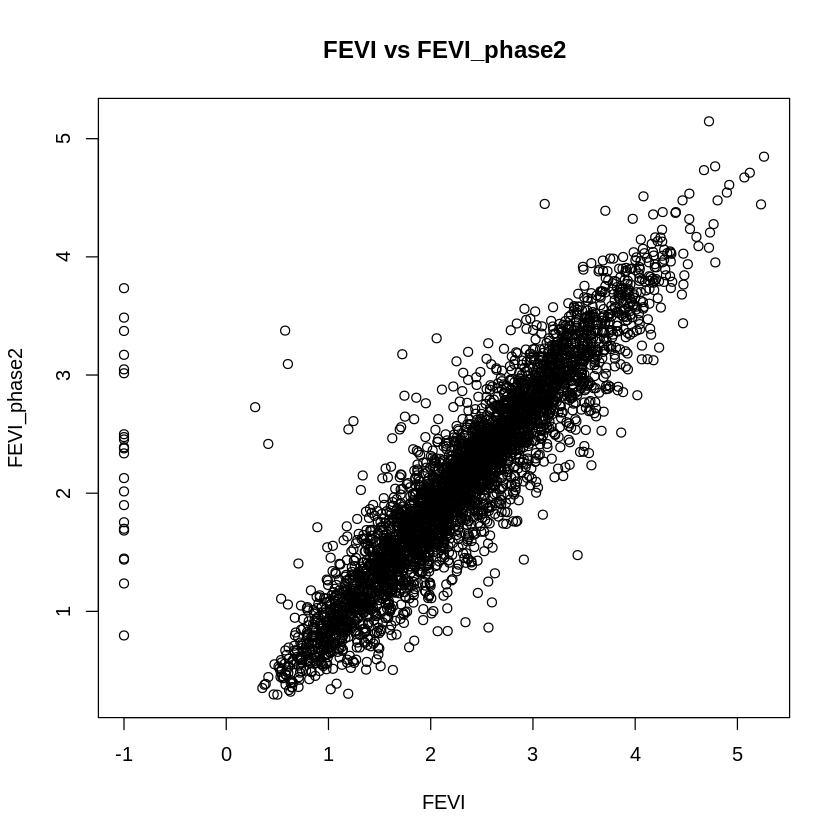

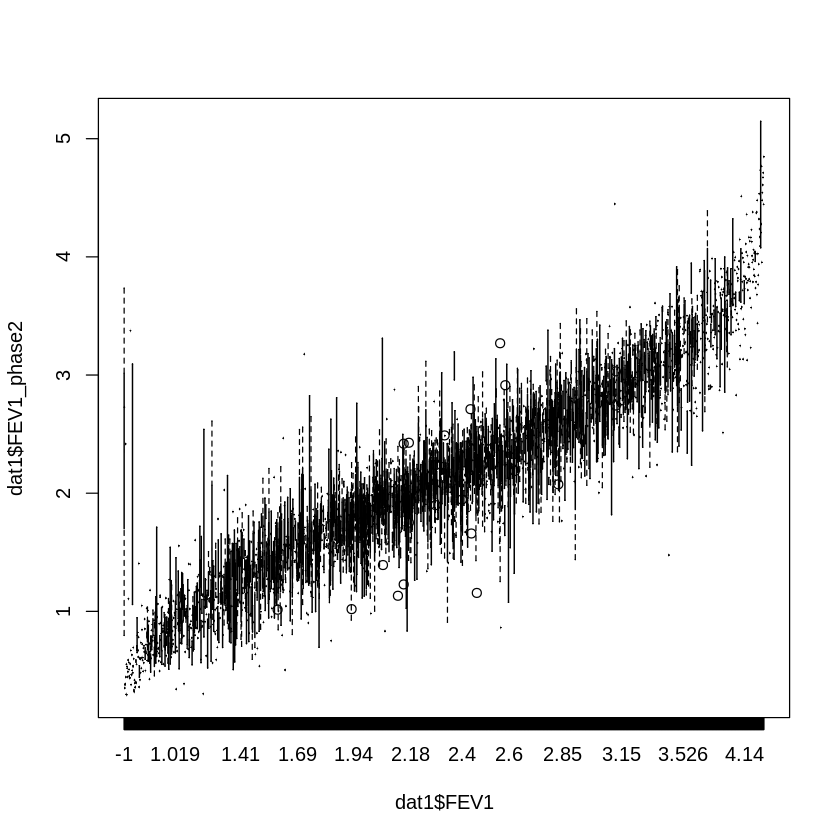

In [ ]:
#4.1
plot(dat1$FEV1, dat1$FEV1_phase2,
     xlab = "FEVI",
     ylab = "FEVI_phase2",
     main = "FEVI vs FEVI_phase2")

boxplot(dat1$FEV1_phase2 ~ dat1$FEV1)     

In [ ]:
#4.2
fit <- lm(FEV1_phase2 ~ FEV1, data = train)
summary(fit)

fit_quadratic <- lm(FEV1_phase2 ~ FEV1 + I(FEV1^2), data = train)
summary(fit_quadratic)


Call:
lm(formula = FEV1_phase2 ~ FEV1, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99642 -0.13773  0.03726  0.17609  0.62804 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.008223   0.094728  -0.087    0.931    
FEV1         0.907236   0.038451  23.595   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2958 on 68 degrees of freedom
Multiple R-squared:  0.8911,	Adjusted R-squared:  0.8895 
F-statistic: 556.7 on 1 and 68 DF,  p-value: < 2.2e-16



Call:
lm(formula = FEV1_phase2 ~ FEV1 + I(FEV1^2), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99989 -0.13877  0.02399  0.18261  0.60653 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.031652   0.183004   0.173    0.863    
FEV1        0.868773   0.155545   5.585 4.59e-07 ***
I(FEV1^2)   0.007914   0.030999   0.255    0.799    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2979 on 67 degrees of freedom
Multiple R-squared:  0.8913,	Adjusted R-squared:  0.888 
F-statistic: 274.6 on 2 and 67 DF,  p-value: < 2.2e-16


In [ ]:
#4.3
prediction <- predict(fit, dat1)
truth      <- dat1$FEV1_phase2

#MSE
mse <- function(true, pred) {
  return(mean((true - pred)^2))
}
mse(truth, prediction)

sqrt(mse(truth, prediction))

[1] 0.1479625

[1] 0.384659

4.4 R-squared is big when it is applied to linear regression. We can assume that the linear regression has strength of the relationship between model and the dependent variable with 89.0%.

<br>

---

<br>






####<font color=red>Task 5</font>  (5 points)

1. Using your final model, `predict` the `FEV1_phase2` values from the `test` dataset, then download and submit these predictions on Canvas.

In [ ]:
#5.1
dat <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv")
test <- dat[which(is.na(dat$FEV1_phase2)),]
preds <- data.frame(sid = test$FEV1_phase2)

write.csv(preds, 'copd_predictions.csv')